# Task 3
- Single complex neuron, stationary input dynamics, Oja rule.

In [219]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random

In [220]:
'''
Some constants and variables are named differently than in Task 0-2, in order to be consistent with the notes.
'''
N = 10 # number of presynaptic neurons
S = 10 # Number of dynamic variables defining each synapse
tau_W = 30 # time constant for weight updates
T = 500 # total simulation time
dt = 0.01 # time step length
y = random.randn(N, 1) # principle component
y = y / np.sqrt(y.T @ y)
# y1 = random.randn(N, 1) # principle component
# y1 = y1 / np.sqrt(y1.T @ y1)
# y2 = random.randn(N, 1) # principle component
# y2 = y2 / np.sqrt(y2.T @ y2)
# print(y1)
# print(y2)

orthog = random.randn(N, 1) 
orthog = orthog - ((orthog.T @ y).item()/(e1.T @ e1).item()) * y # second principal component of covariance
orthog = orthog / np.sqrt(orthog.T @ orthog)
epsilon = 1 # magnitude of noise
sigma = 1 # variance of s
alpha = 1
beta = 1
n = 2
T_e = 800 # time interval between changes of direction of y

W0 = 0.1 * random.randn(S, N) # weight vector initialisation
e1 = np.zeros((S, 1))
e1[0,0] = 1
P = e1 @ (e1.T)
L = np.zeros((S, S))
for a in range(S):
    L[a, a] = -beta * (n ** (-2*(a+1) + 1) * (n + 1))
    if a == 0:
         L[a, a] = -beta * (n ** (-2*(a+1) + 1))
    if a != 0:
        L[a, a-1] = beta * (n ** (-2*(a+1) + 2))
    if a != S-1:
        L[a, a+1] = beta * (n ** (-2*(a+1) + 1))


In [221]:
W = W0
w_history = []
w_norm_history = []
w_para_y_history = []
w_orthog_y_history = []
u_history = []

for t in np.arange(0, T, dt):

    # if t % T_e == 0:
    #     y = random.randn(N, 1) # principal component
    #     y = y / np.sqrt(y.T.dot(y))
    #     orthog = random.randn(N, 1) 
    #     orthog = orthog - ((orthog.T @ y).item()/(e1.T @ e1).item()) * y 
    #     orthog = orthog / np.sqrt(orthog.T @ orthog)

    s = sigma * random.randn(1)
    xi = epsilon * random.randn(N, 1)
    u = s * y + xi
    C = u @ (u.T)
    W = W + dt * (1/tau_W) * (L @ W + P @ W @ C - alpha * np.trace(P @ W @ C @ W.T) * P @ W)
    w = W.T @ e1
    w_history.append(w)
    u_history.append(u)
    w_norm_history.append(np.sqrt(w.T @ w))
    w_para_y_history.append(w.T @ y/np.sqrt(y.T @ y))
    w_orthog_y_history.append(w.T @ orthog/np.sqrt(orthog.T @ orthog))

w_norm_history = np.array(w_norm_history)
w_norm_history = w_norm_history.squeeze()
w_para_y_history = np.array(w_para_y_history)
w_para_y_history = w_para_y_history.squeeze()
w_orthog_y_history = np.array(w_orthog_y_history)
w_orthog_y_history = w_orthog_y_history.squeeze()

Text(0, 0.5, &#39;Projection orthogonal to principal direction&#39;)

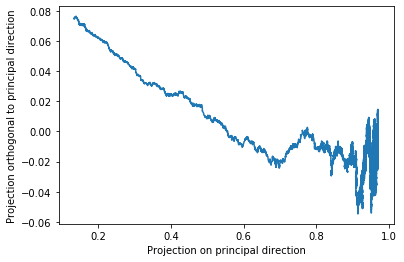

In [222]:
f0 = plt.figure(0)
plt.plot(w_para_y_history, w_orthog_y_history)
plt.xlabel('Projection on principal direction')
plt.ylabel('Projection orthogonal to principal direction')

Text(0, 0.5, &#39;$|\\mathbf{w}|$&#39;)

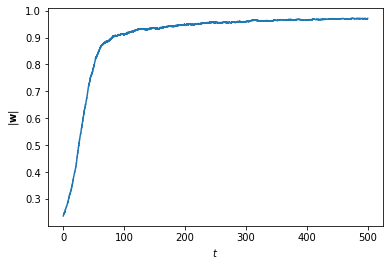

In [223]:
f1 = plt.figure(1)
plt.plot(np.arange(0, T, dt), w_norm_history)

plt.xlabel('$t$')
plt.ylabel('$|\mathbf{w}|$')

Text(0, 0.5, &#39;$\\cos(\\theta)$&#39;)

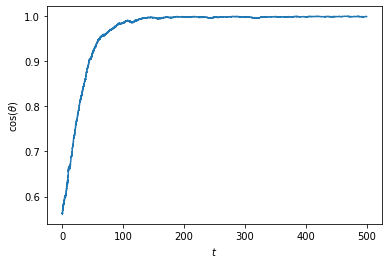

In [224]:
f2 = plt.figure(2)
plt.plot(np.arange(0, T, dt), w_para_y_history/w_norm_history)

plt.xlabel('$t$')
plt.ylabel('$\cos(\\theta)$')